In [61]:
%autosave 0

Autosave disabled


In [62]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [63]:
ds1 = xr.open_dataset('data/different_porosities/1_po65-25_di10e-9/water.nc')

In [64]:
alkflux_df = ds1['B_C_Alk   _flux'].to_dataframe()

In [65]:
alkflux_df = alkflux_df.reset_index()

In [67]:
alkflux_df.z_faces.values[0]

2.5

In [3]:
ds1 = xr.open_dataset('data/low_sulfate_reduction_rate/1_po75-25_di2e-9/water.nc')
ds2 = xr.open_dataset('data/low_sulfate_reduction_rate/2_po75-25_di6e-9/water.nc')
ds3 = xr.open_dataset('data/low_sulfate_reduction_rate/3_po75-25_di10e-9/water.nc')
ds4 = xr.open_dataset('data/low_sulfate_reduction_rate/4_po75-25_di14e-9/water.nc')
ds5 = xr.open_dataset('data/low_sulfate_reduction_rate/5_po75-25_di18e-9/water.nc')
ds6 = xr.open_dataset('data/low_sulfate_reduction_rate/6_po75-25_di24e-9/water.nc')
ds7 = xr.open_dataset('data/low_sulfate_reduction_rate/7_po75-25_di28e-9/water.nc')
ds8 = xr.open_dataset('data/low_sulfate_reduction_rate/8_po75-25_di35e-9/water.nc')
ds9 = xr.open_dataset('data/low_sulfate_reduction_rate/9_po75-25_di45e-9/water.nc')
#ds10 = xr.open_dataset('data/low_sulfate_reduction_rate/10_po75-25_di20e-9/water.nc')
#ds11 = xr.open_dataset('data/low_sulfate_reduction_rate/11_po75-25_di24e-9/water.nc')
#ds12 = xr.open_dataset('data/low_sulfate_reduction_rate/12_po75-25_di28e-9/water.nc')
#ds13 = xr.open_dataset('data/low_sulfate_reduction_rate/13_po75-25_di35e-9/water.nc')

In [16]:
ds1 = xr.open_dataset('data/high_sulfate_reduction_rate/1_po75-25_di5e-8/water.nc')
ds2 = xr.open_dataset('data/high_sulfate_reduction_rate/2_po75-25_di4e-8/water.nc')
ds3 = xr.open_dataset('data/high_sulfate_reduction_rate/3_po75-25_di3e-8/water.nc')
ds4 = xr.open_dataset('data/high_sulfate_reduction_rate/4_po75-25_di2e-8/water.nc')
ds5 = xr.open_dataset('data/high_sulfate_reduction_rate/5_po75-25_di1e-8/water.nc')
ds6 = xr.open_dataset('data/high_sulfate_reduction_rate/6_po75-25_di9e-9/water.nc')
ds7 = xr.open_dataset('data/high_sulfate_reduction_rate/7_po75-25_di8e-9/water.nc')
ds8 = xr.open_dataset('data/high_sulfate_reduction_rate/8_po75-25_di7e-9/water.nc')
ds9 = xr.open_dataset('data/high_sulfate_reduction_rate/9_po75-25_di6e-9/water.nc')
ds10 = xr.open_dataset('data/high_sulfate_reduction_rate/10_po75-25_di5e-9/water.nc')
ds11 = xr.open_dataset('data/high_sulfate_reduction_rate/11_po75-25_di4e-9/water.nc')
ds12 = xr.open_dataset('data/high_sulfate_reduction_rate/12_po75-25_di3e-9/water.nc')
ds13 = xr.open_dataset('data/high_sulfate_reduction_rate/13_po75-25_di2e-9/water.nc')

In [4]:
alk_year = []
alkflux_bottom_year = []

In [5]:
i = 0
for ds in (ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9):#, ds10, ds11, ds12, ds13):
    alk_df = ds['B_C_Alk'].to_dataframe()
    alkflux_df = ds['B_C_Alk   _flux'].to_dataframe()
    alk = alk_df.groupby('z').get_group(0.625)
    alkflux_bottom = alkflux_df.groupby('z_faces').get_group(2.5)
    alk_year.append(alk.loc['2011-01-01':'2011-12-31'])
    alkflux_bottom_year.append(alkflux_bottom.loc['2011-01-01':'2011-12-31'])
    alk_year[i] = alk_year[i].reset_index()
    alkflux_bottom_year[i] = alkflux_bottom_year[i].reset_index()
    alk_year[i]['B_C_Alk'] = alk_year[i]['B_C_Alk']-alk_year[i]['B_C_Alk'].min()
    i += 1

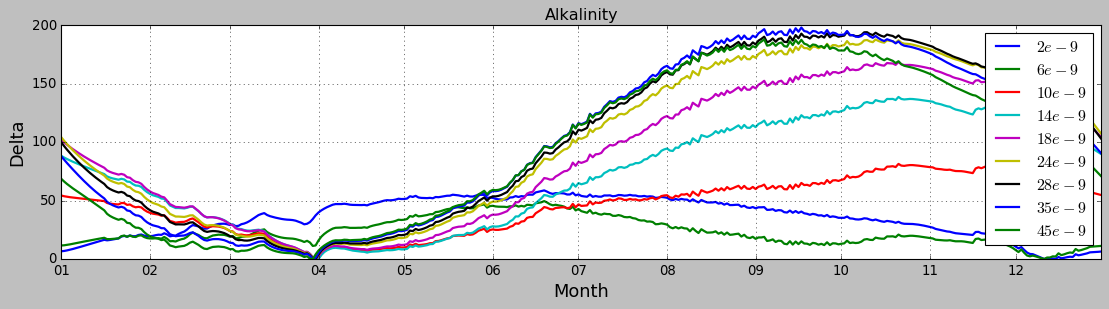

In [6]:
plt.style.use('classic')
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1) # row-col-num
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.plot(alk_year[0]['time'], alk_year[0]['B_C_Alk'], linewidth=2, label=r'$2e-9$')
ax.plot(alk_year[1]['time'], alk_year[1]['B_C_Alk'], linewidth=2, label=r'$6e-9$')
ax.plot(alk_year[2]['time'], alk_year[2]['B_C_Alk'], linewidth=2, label=r'$10e-9$')
ax.plot(alk_year[3]['time'], alk_year[3]['B_C_Alk'], linewidth=2, label=r'$14e-9$')
ax.plot(alk_year[4]['time'], alk_year[4]['B_C_Alk'], linewidth=2, label=r'$18e-9$')
ax.plot(alk_year[5]['time'], alk_year[5]['B_C_Alk'], linewidth=2, label=r'$24e-9$')
ax.plot(alk_year[6]['time'], alk_year[6]['B_C_Alk'], linewidth=2, label=r'$28e-9$')
ax.plot(alk_year[7]['time'], alk_year[7]['B_C_Alk'], linewidth=2, label=r'$35e-9$')
ax.plot(alk_year[8]['time'], alk_year[8]['B_C_Alk'], linewidth=2, label=r'$45e-9$')
#ax.plot(alk_year[9]['time'], alk_year[9]['B_C_Alk'], linewidth=2, label=r'$20e-9$')
#ax.plot(alk_year[10]['time'], alk_year[10]['B_C_Alk'], linewidth=2, label=r'$24e-9$')
#ax.plot(alk_year[11]['time'], alk_year[11]['B_C_Alk'], linewidth=2, label=r'$28e-9$')
#ax.plot(alk_year[12]['time'], alk_year[12]['B_C_Alk'], linewidth=2, label=r'$35e-9$')
# --- add title and axis labels
ax.set_title('Alkalinity')
ax.set_ylabel('Delta', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
# --- plot a legend in the best location
ax.legend(loc='best')
# --- add grid – not in default classic style
ax.grid(True)
# --- improve the layout
fig.tight_layout(pad=1)

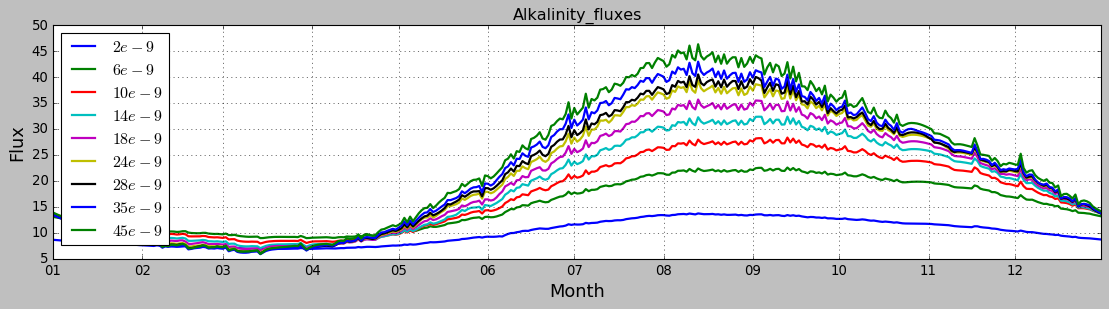

In [7]:
plt.style.use('classic')
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1) # row-col-num
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.plot(alkflux_bottom_year[0]['time'], alkflux_bottom_year[0]['B_C_Alk   _flux'], linewidth=2, label=r'$2e-9$')
ax.plot(alkflux_bottom_year[1]['time'], alkflux_bottom_year[1]['B_C_Alk   _flux'], linewidth=2, label=r'$6e-9$')
ax.plot(alkflux_bottom_year[2]['time'], alkflux_bottom_year[2]['B_C_Alk   _flux'], linewidth=2, label=r'$10e-9$')
ax.plot(alkflux_bottom_year[3]['time'], alkflux_bottom_year[3]['B_C_Alk   _flux'], linewidth=2, label=r'$14e-9$')
ax.plot(alkflux_bottom_year[4]['time'], alkflux_bottom_year[4]['B_C_Alk   _flux'], linewidth=2, label=r'$18e-9$')
ax.plot(alkflux_bottom_year[5]['time'], alkflux_bottom_year[5]['B_C_Alk   _flux'], linewidth=2, label=r'$24e-9$')
ax.plot(alkflux_bottom_year[6]['time'], alkflux_bottom_year[6]['B_C_Alk   _flux'], linewidth=2, label=r'$28e-9$')
ax.plot(alkflux_bottom_year[7]['time'], alkflux_bottom_year[7]['B_C_Alk   _flux'], linewidth=2, label=r'$35e-9$')
ax.plot(alkflux_bottom_year[8]['time'], alkflux_bottom_year[8]['B_C_Alk   _flux'], linewidth=2, label=r'$45e-9$')
# --- add title and axis labels
ax.set_title('Alkalinity_fluxes')
ax.set_ylabel('Flux', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
# --- plot a legend in the best location
ax.legend(loc='best')
# --- add grid – not in default classic style
ax.grid(True)
# --- improve the layout
fig.tight_layout(pad=1)